<a href="https://colab.research.google.com/github/Kelvin9393/DeepLearning/blob/main/Is_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from fastai.vision.all import *

In [5]:
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

In [6]:
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid=0.2,
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(224)
)

In [7]:
learn = vision_learner(
    dls,
    resnet34,
    metrics=error_rate
)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 82.2MB/s]


In [11]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.170471,0.022646,0.006766,36:16


epoch,train_loss,valid_loss,error_rate,time
0,0.064634,0.017342,0.006089,54:04


In [1]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Is this a cat?: True.
Probability it's a cat: 1.000000


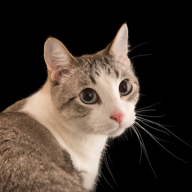

In [16]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
img.to_thumb(192)

Is this a cat?: False.
Probability it's a cat: 0.000006


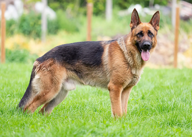

In [17]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
img.to_thumb(192)